In [2]:
import os
import similaritymeasures
import numpy as np
import cv2
from matplotlib import pyplot as plt

import seaborn as sns

import pandas as pd

In [5]:
def get_scores(val_data_path, val_run_path, save_loc):
    os.makedirs(save_loc,exist_ok=True)
    frechet_dists = []
    euclidean_dists = []
    for episode in range(25):
        episode = str(episode)
        filename = os.path.join(val_run_path,episode,'vehicle_positions.txt')
        with open(filename,'r') as f:
            positions = f.readlines()
        run_traj = np.array([ [ float(t.strip()) for t in x.strip().split(',')] for x in positions])

        filename = os.path.join(val_data_path,episode,'vehicle_positions.txt')
        with open(filename,'r') as f:
            positions = f.readlines()
        data_traj = np.array([ [ float(t.strip()) for t in x.strip().split(',')] for x in positions])

        filename = os.path.join(val_run_path,episode,'command.txt')
        with open(filename,'r') as f:
            command = f.readline().strip()

        plt.plot(data_traj[:,0],data_traj[:,1],label='Ground Truth')
        plt.plot(run_traj[:,0],run_traj[:,1],label='Inference on Prediction')
        plt.scatter(data_traj[-1,0],data_traj[-1,1],s=100,label='Ground Truth - End Point')
        plt.scatter(run_traj[-1,0],run_traj[-1,1],s=100,label='Inference - End Point')
        plt.scatter(data_traj[0,0],data_traj[0,1],s=100,label='Starting Point')

        x_min = np.min(np.hstack([data_traj[:,0],run_traj[:,0]]))
        y_min = np.min(np.hstack([data_traj[:,1],run_traj[:,1]]))

        x_max = np.max(np.hstack([data_traj[:,0],run_traj[:,0]]))
        y_max = np.max(np.hstack([data_traj[:,1],run_traj[:,1]]))

        frechet_dists.append(similaritymeasures.frechet_dist(run_traj,data_traj))

        euclidean_dists.append(similaritymeasures.distance.euclidean(data_traj[-1,:],run_traj[-1,:]))

        plt.xlim(x_min-5, x_max+5)
        plt.ylim(y_min-5, y_max+5)
        plt.gca().invert_xaxis()
#         plt.axis('off')
        plt.title(command)

        plt.legend()
        print(f'Episode {episode}: {command}')
        print(f'Frechet Distance: {frechet_dists[-1]}')
        print(f'Euclidean Distance between End Points: {euclidean_dists[-1]}')
    #     print(f'Curve Length Measure: {cl_measures[-1]}')
        plt.savefig(os.path.join(save_loc,episode)+'.png')    
        plt.show()
    return frechet_dists, euclidean_dists

In [17]:
# ! scp varunc@ada:/share3/varunc/val_runs.zip /ssd_scratch/cvit/varunc
# ! unzip /ssd_scratch/cvit/varunc/val_runs.zip
# ! scp varunc@ada:/share3/varunc/val_run_baseline.zip /ssd_scratch/cvit/varunc
# ! unzip /ssd_scratch/cvit/varunc/val_run_baseline.zip
# ! scp varunc@ada:/share3/varunc/val_convlstm.zip /ssd_scratch/cvit/varunc
# ! scp varunc@ada:/share3/varunc/val_framebyframe.zip /ssd_scratch/cvit/varunc
# ! scp varunc@ada:/share3/varunc/val_fbf2.zip /ssd_scratch/cvit/varunc
# unzip /ssd_scratch/cvit/varunc/val_convlstm.zip

val_fbf2.zip                                  100% 4509KB   4.4MB/s   00:00    


Episode 0: park near the bus stand
Frechet Distance: 8.067973423453093
Euclidean Distance between End Points: 8.067973423453093


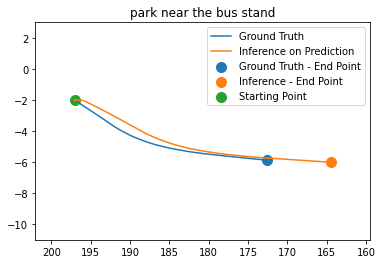

Episode 1: stop near the tallest building
Frechet Distance: 53.00581683992712
Euclidean Distance between End Points: 53.005816839927114


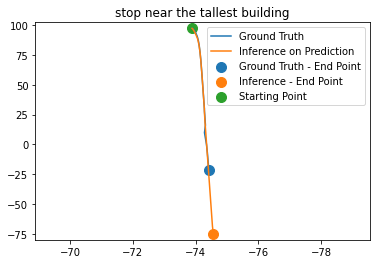

Episode 2: Take a right from the intersection
Frechet Distance: 17.871254623761335
Euclidean Distance between End Points: 17.871254623761335


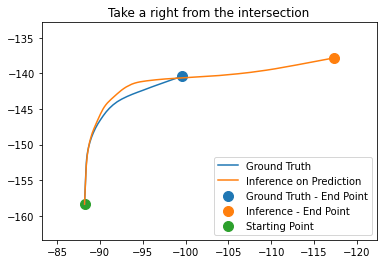

Episode 3: go right from the corner
Frechet Distance: 5.424230403686319
Euclidean Distance between End Points: 5.424230403686319


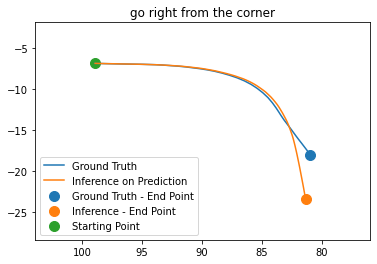

Episode 4: Drive towards the bus stop
Frechet Distance: 5.883544924222516
Euclidean Distance between End Points: 5.883544924222516


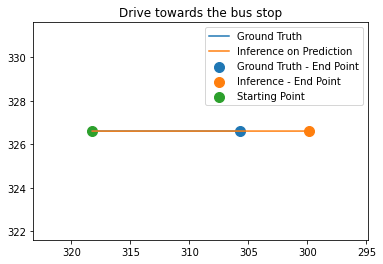

Episode 5: take a left from the intersection
Frechet Distance: 4.207446052814155
Euclidean Distance between End Points: 4.207446052814155


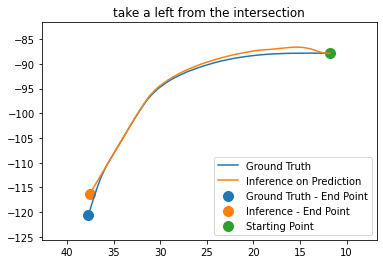

Episode 6: take a right and stop near the pedestrian
Frechet Distance: 37.17586127416498
Euclidean Distance between End Points: 37.17586127416498


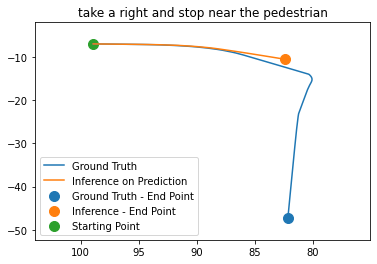

Episode 7: stop beside the blue car
Frechet Distance: 10.09984141678516
Euclidean Distance between End Points: 10.09984141678516


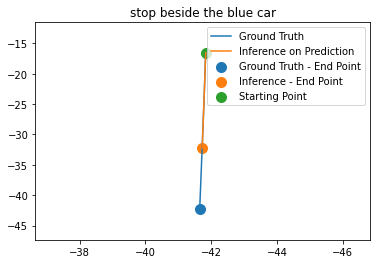

Episode 8: wait for the signal to turn green and then go straight
Frechet Distance: 10.352713689506274
Euclidean Distance between End Points: 10.352713689506274


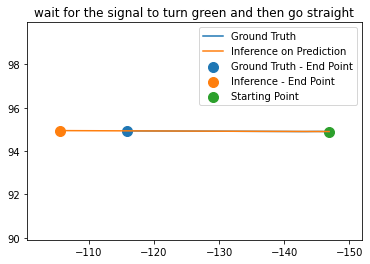

Episode 9: Go straight from the intersection and stop next to the bus stop.
Frechet Distance: 17.818345388514963
Euclidean Distance between End Points: 17.818345388514963


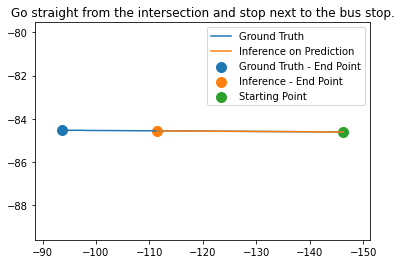

Episode 10: Go straight and park behind the first car you see
Frechet Distance: 9.51998711581825
Euclidean Distance between End Points: 9.51998711581825


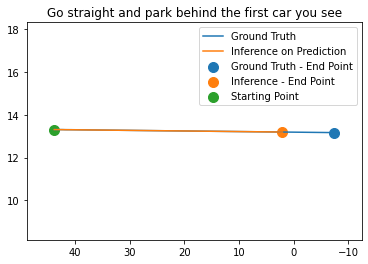

Episode 11: stop by the lamp pole
Frechet Distance: 14.914040665385825
Euclidean Distance between End Points: 14.914040665385825


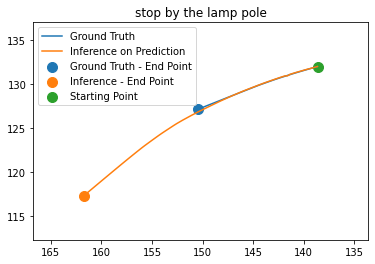

Episode 12: stop across the house with stairs
Frechet Distance: 12.079165110970228
Euclidean Distance between End Points: 12.079165110970228


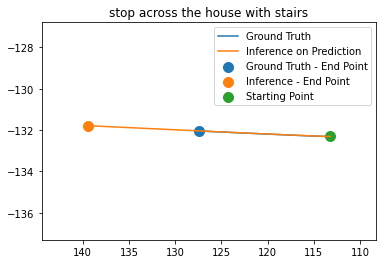

Episode 13: stop in front of the maroon car in the rightmost lane
Frechet Distance: 15.04982720957462
Euclidean Distance between End Points: 15.04982720957462


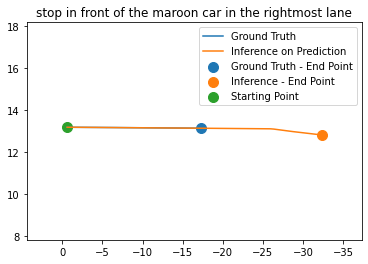

Episode 14: Go right from the corner
Frechet Distance: 13.981770864218579
Euclidean Distance between End Points: 13.981770864218579


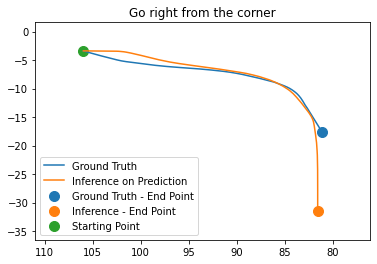

Episode 15: park behind the brown car
Frechet Distance: 29.106283996023823
Euclidean Distance between End Points: 29.106283996023823


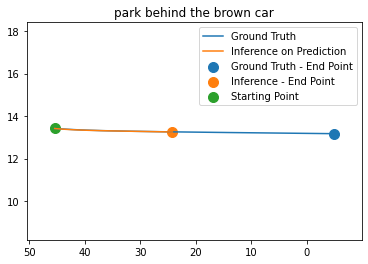

Episode 16: take a right and stop near the pedestrian
Frechet Distance: 65.61630701945079
Euclidean Distance between End Points: 65.61630701945079


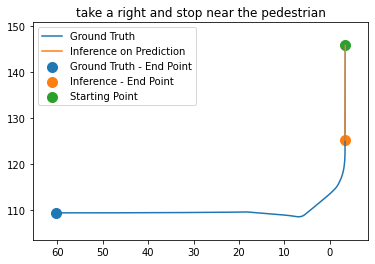

Episode 17: take a right at the intersection
Frechet Distance: 20.762823002626956
Euclidean Distance between End Points: 20.76282300262696


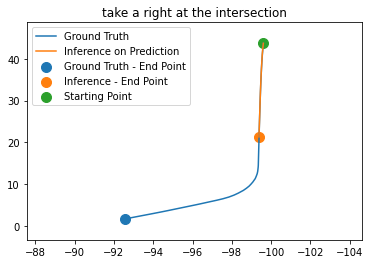

Episode 18: take a right at the traffic lights and then take left
Frechet Distance: 63.527856365659964
Euclidean Distance between End Points: 45.156935943449724


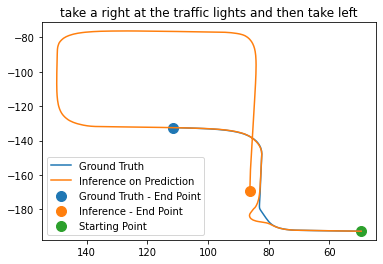

Episode 19: take the road on the left
Frechet Distance: 2.7103160049226553
Euclidean Distance between End Points: 2.7103160049226553


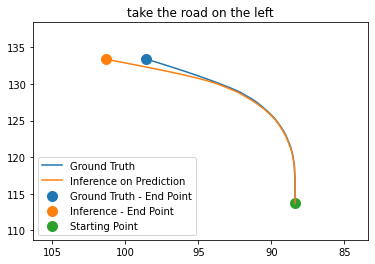

Episode 20: wait for traffic light then take left
Frechet Distance: 53.95504227361281
Euclidean Distance between End Points: 53.95504227361281


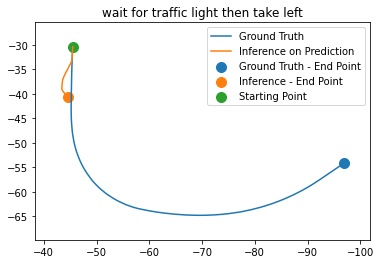

Episode 21: stop as soon as you encounter a white car
Frechet Distance: 0.368214965962211
Euclidean Distance between End Points: 0.36821496596221104


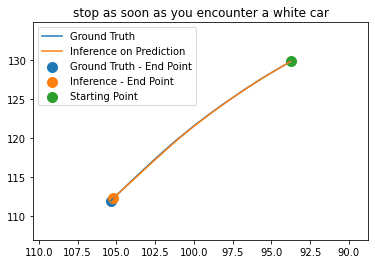

Episode 22: Stop near the blue dustbin which you see in front
Frechet Distance: 8.532989562777306
Euclidean Distance between End Points: 8.532989562777306


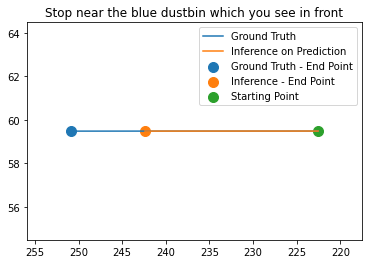

Episode 23: wait for the green signal then take a left from the intersection
Frechet Distance: 2.642106887648068
Euclidean Distance between End Points: 0.4621645707569786


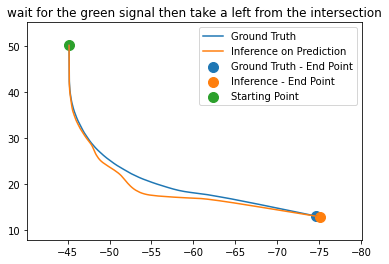

Episode 24: stop in front of the white car
Frechet Distance: 26.52107739333949
Euclidean Distance between End Points: 26.521077393339485


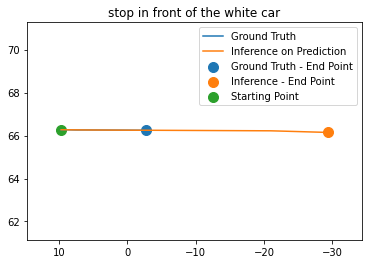

In [12]:
val_data_path = '/ssd_scratch/cvit/varunc/carla_data/val/'
val_run_path = '/ssd_scratch/cvit/varunc/val_runs/'
save_loc = '../trajectories/'

f,e = get_scores(val_data_path, val_run_path, save_loc)

Episode 0: park near the bus stand
Frechet Distance: 13.006019266899838
Euclidean Distance between End Points: 13.006019266899838


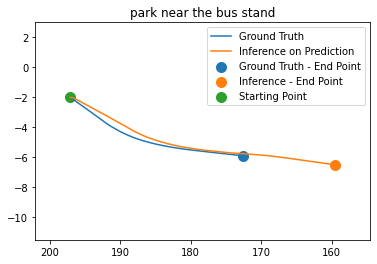

Episode 1: stop near the tallest building
Frechet Distance: 63.003395188520855
Euclidean Distance between End Points: 63.003395188520855


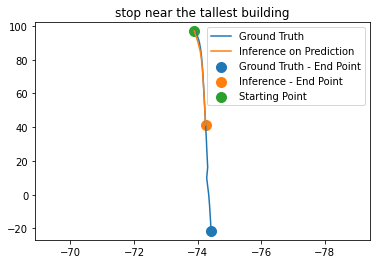

Episode 2: Take a right from the intersection
Frechet Distance: 137.11926941021343
Euclidean Distance between End Points: 137.11926941021343


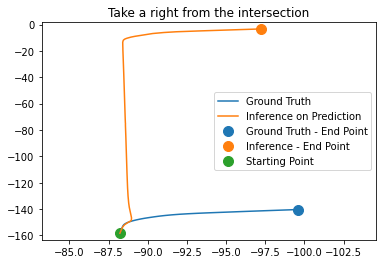

Episode 3: Go right from the corner
Frechet Distance: 7.736503177297763
Euclidean Distance between End Points: 7.736503177297763


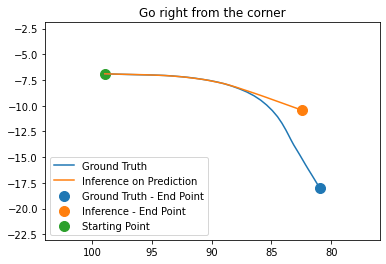

Episode 4: Drive towards the bus stop
Frechet Distance: 1.6632995812768905
Euclidean Distance between End Points: 1.6632995812768905


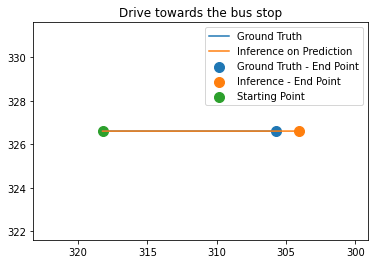

Episode 5: Take a left from the intersection.
Frechet Distance: 1.8460870133178555
Euclidean Distance between End Points: 1.4270228078429286


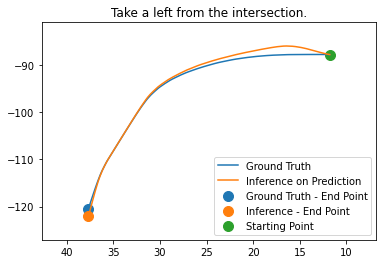

Episode 6: take a right and stop near the pedestrian
Frechet Distance: 14.185906223972147
Euclidean Distance between End Points: 14.185906223972147


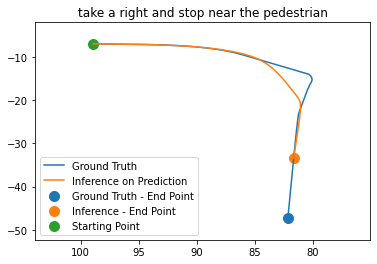

Episode 7: stop beside the black suv
Frechet Distance: 3.6261864010794627
Euclidean Distance between End Points: 3.6261864010794627


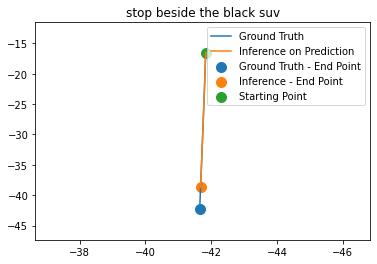

Episode 8: Wait for the signal to turn green and then go straight
Frechet Distance: 26.41249263550796
Euclidean Distance between End Points: 26.41249263550796


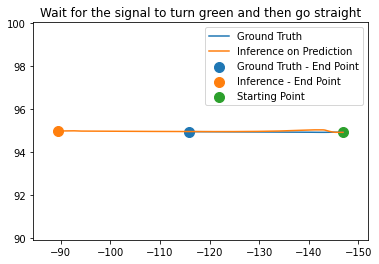

Episode 9: Go straight from the intersection and stop next to the bus stop.
Frechet Distance: 77.36270187149066
Euclidean Distance between End Points: 77.36270187149066


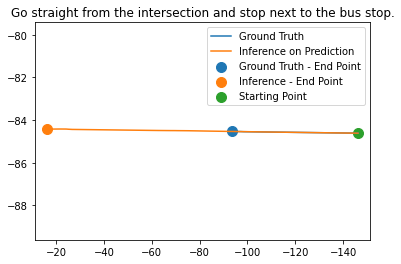

Episode 10: Go straight and park behind the first car you see
Frechet Distance: 28.329270868081775
Euclidean Distance between End Points: 28.329270868081775


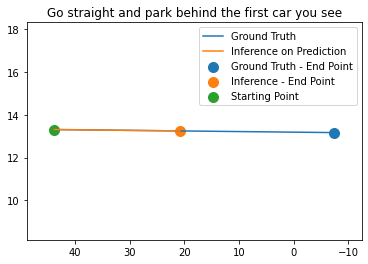

Episode 11: stop by the lamp pole
Frechet Distance: 21.00350591089994
Euclidean Distance between End Points: 21.00350591089994


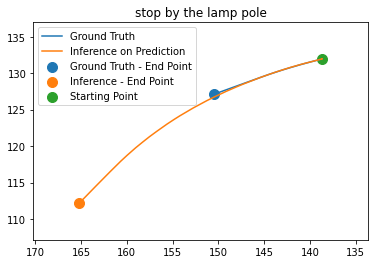

Episode 12: stop across the house with stairs
Frechet Distance: 325.23118405280866
Euclidean Distance between End Points: 325.23118405280866


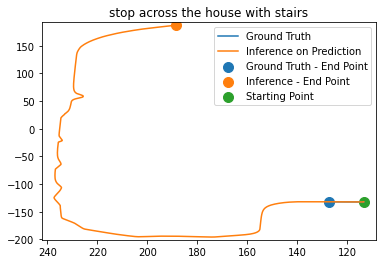

Episode 13: stop in front of the maroon car in rightmost lane
Frechet Distance: 7.650849697950139
Euclidean Distance between End Points: 7.650849697950139


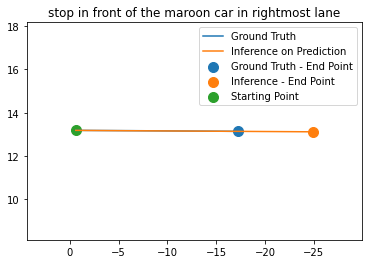

Episode 14: Go right from the corner
Frechet Distance: 16.989794140821623
Euclidean Distance between End Points: 16.989794140821623


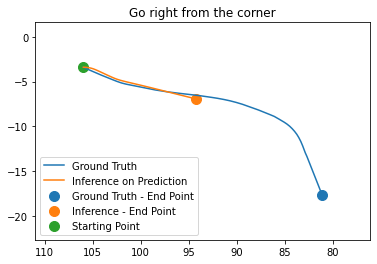

Episode 15: park behind the brown car
Frechet Distance: 12.066074762903888
Euclidean Distance between End Points: 12.066074762903888


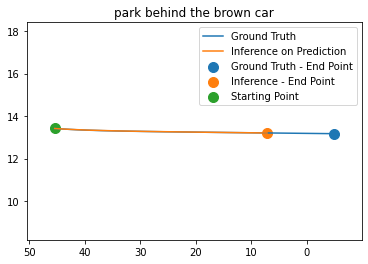

Episode 16: take a right and stop near the man in blue
Frechet Distance: 55.62590568066001
Euclidean Distance between End Points: 55.62590568066001


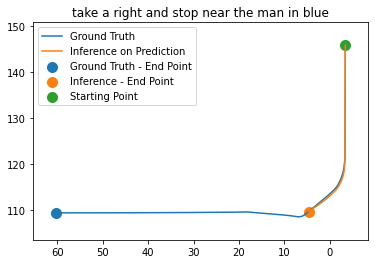

Episode 17: take a right at the intersection
Frechet Distance: 103.7235080749895
Euclidean Distance between End Points: 10.288549626852891


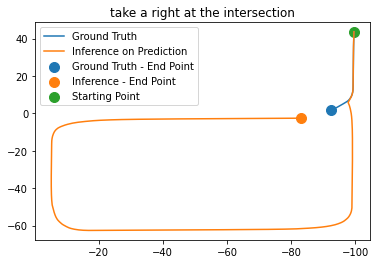

Episode 18: take a right at the traffic lights and then take a left
Frechet Distance: 86.57282310110722
Euclidean Distance between End Points: 86.5728231011072


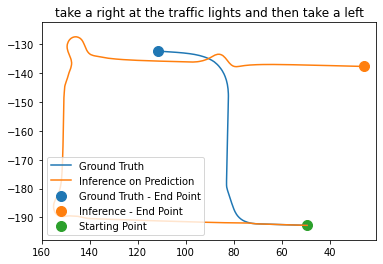

Episode 19: Take the road on the left
Frechet Distance: 13.733448073241268
Euclidean Distance between End Points: 13.733448073241268


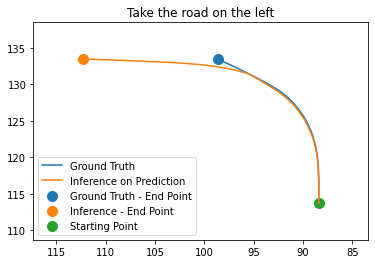

Episode 20: wait for traffic light then take left
Frechet Distance: 85.82482001286712
Euclidean Distance between End Points: 82.80592156063449


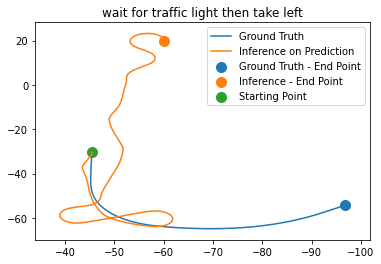

Episode 21: Stop as soon as you encounter a white car
Frechet Distance: 4.822223017055579
Euclidean Distance between End Points: 4.822223017055579


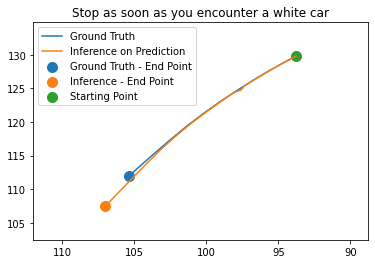

Episode 22: Stop near the blue dustbin which you see in front
Frechet Distance: 16.16548169238673
Euclidean Distance between End Points: 16.16548169238673


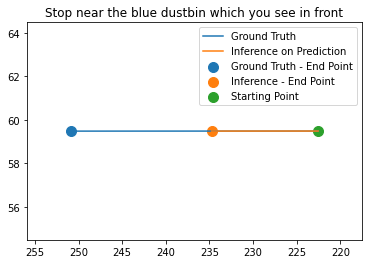

Episode 23: Wait for the green signal then take a left from the intersection.
Frechet Distance: 24.412129996741392
Euclidean Distance between End Points: 24.412129996741392


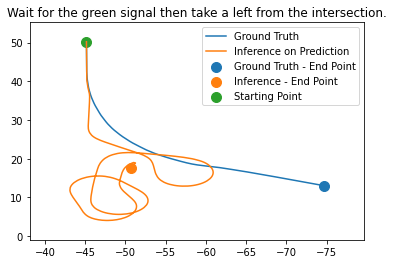

Episode 24: Stop in front of the white car
Frechet Distance: 21.33580137311369
Euclidean Distance between End Points: 21.33580137311369


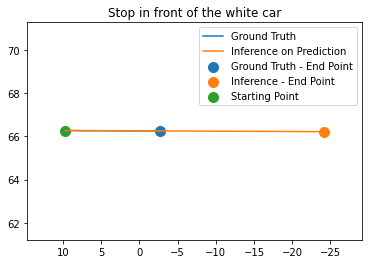

In [13]:
val_data_path = '/ssd_scratch/cvit/varunc/carla_data/val/'
val_run_path = '/ssd_scratch/cvit/varunc/val_framebyframe/'
save_loc = '../trajectories/'

f_fbf,e_fbf = get_scores(val_data_path, val_run_path, save_loc)

Episode 0: park near the bus stand
Frechet Distance: 0.855884415556815
Euclidean Distance between End Points: 0.855884415556815


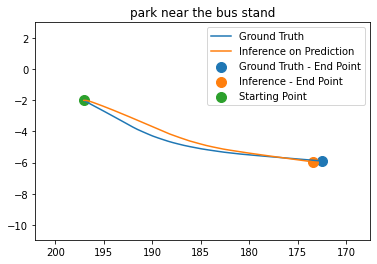

Episode 1: stop near the tallest building
Frechet Distance: 83.1309422672648
Euclidean Distance between End Points: 83.1309422672648


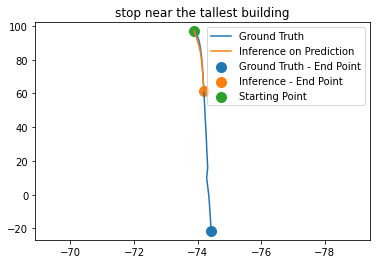

Episode 2: Take a right from the intersection
Frechet Distance: 0.8185536531688291
Euclidean Distance between End Points: 0.8185536531688291


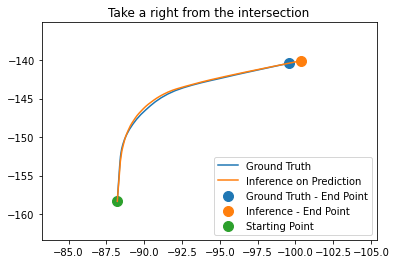

Episode 3: Go right from the corner
Frechet Distance: 18.987466306322904
Euclidean Distance between End Points: 18.987466306322904


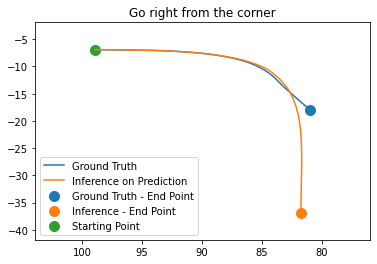

Episode 4: Drive towards the bus stop
Frechet Distance: 5.2103881870709285
Euclidean Distance between End Points: 5.2103881870709285


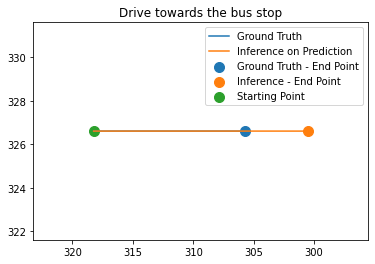

Episode 5: Take a left from the intersection.
Frechet Distance: 3.200669571421384
Euclidean Distance between End Points: 3.200669571421384


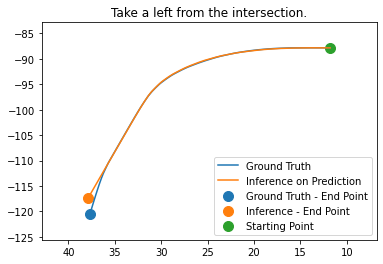

Episode 6: take a right and stop near the pedestrian
Frechet Distance: 10.728202562413522
Euclidean Distance between End Points: 10.728202562413522


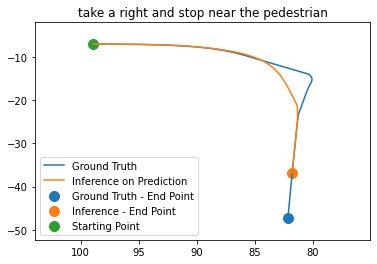

Episode 7: stop beside the black suv
Frechet Distance: 2.2274025907345796
Euclidean Distance between End Points: 2.2274025907345796


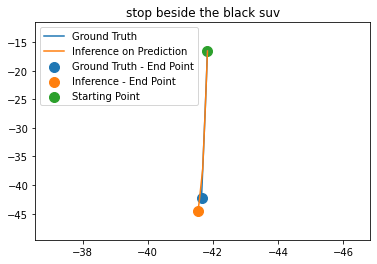

Episode 8: Wait for the signal to turn green and then go straight
Frechet Distance: 7.336490810057517
Euclidean Distance between End Points: 7.336490810057517


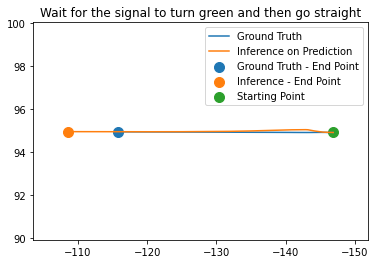

Episode 9: Go straight from the intersection and stop next to the bus stop.
Frechet Distance: 6.807087892704714
Euclidean Distance between End Points: 6.807087892704714


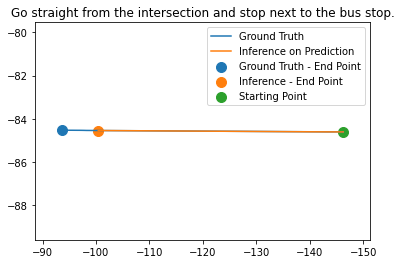

Episode 10: Go straight and park behind the first car you see
Frechet Distance: 33.97933106228027
Euclidean Distance between End Points: 33.979331062280274


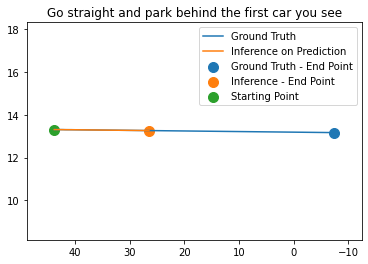

Episode 11: stop by the lamp pole
Frechet Distance: 8.149801843673567
Euclidean Distance between End Points: 8.149801843673568


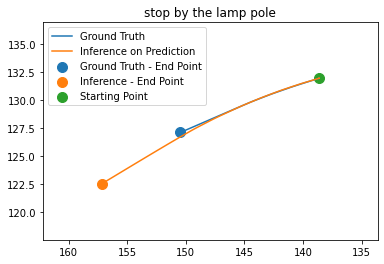

Episode 12: stop across the house with stairs
Frechet Distance: 18.64487553462898
Euclidean Distance between End Points: 18.64487553462898


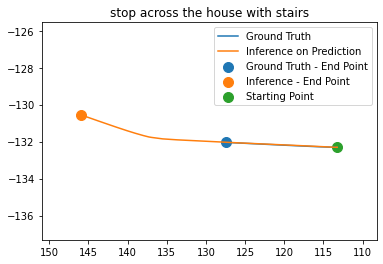

Episode 13: stop in front of the maroon car in rightmost lane
Frechet Distance: 9.203801763980948
Euclidean Distance between End Points: 9.203801763980948


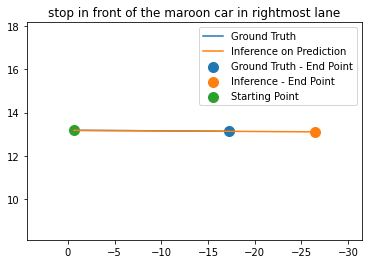

Episode 14: Go right from the corner
Frechet Distance: 14.185151913582736
Euclidean Distance between End Points: 14.185151913582736


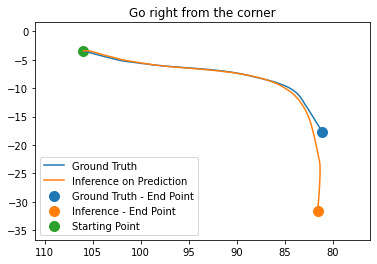

Episode 15: park behind the brown car
Frechet Distance: 18.451971939124057
Euclidean Distance between End Points: 18.451971939124057


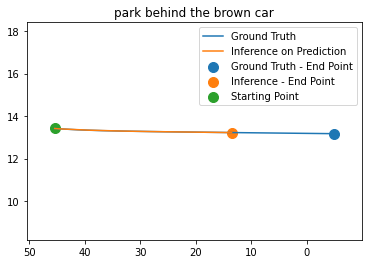

Episode 16: take a right and stop near the man in blue
Frechet Distance: 33.9814499691365
Euclidean Distance between End Points: 33.9814499691365


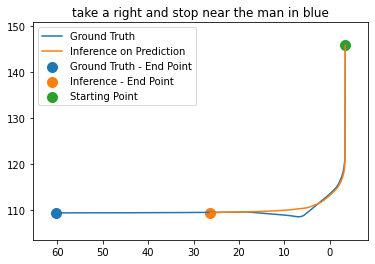

Episode 17: take a right at the intersection
Frechet Distance: 14.174227579679448
Euclidean Distance between End Points: 14.174227579679448


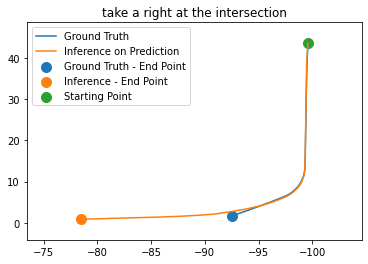

Episode 18: take a right at the traffic lights and then take a left
Frechet Distance: 36.88235992076928
Euclidean Distance between End Points: 36.88235992076928


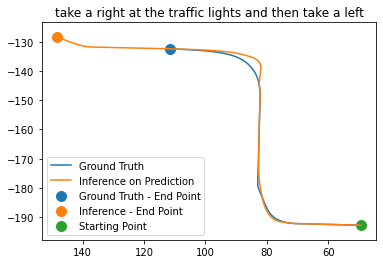

Episode 19: Take the road on the left
Frechet Distance: 241.7422059857385
Euclidean Distance between End Points: 105.29064770407048


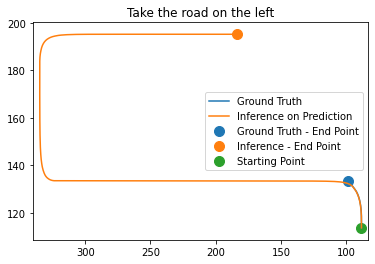

Episode 20: wait for traffic light then take left
Frechet Distance: 178.348743637558
Euclidean Distance between End Points: 178.348743637558


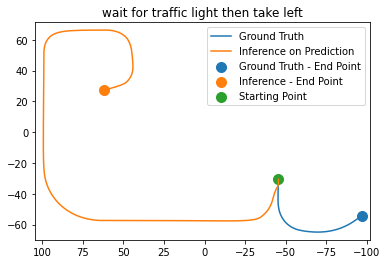

Episode 21: Stop as soon as you encounter a white car
Frechet Distance: 2.9145658070015714
Euclidean Distance between End Points: 2.9145658070015714


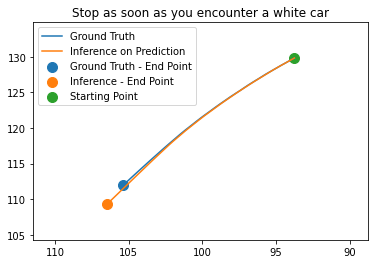

Episode 22: Stop near the blue dustbin which you see in front
Frechet Distance: 2.8832550338450638
Euclidean Distance between End Points: 2.8832550338450638


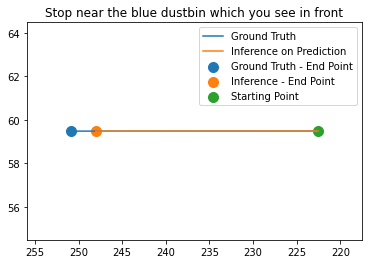

Episode 23: Wait for the green signal then take a left from the intersection.
Frechet Distance: 11.456212518466938
Euclidean Distance between End Points: 11.456212518466938


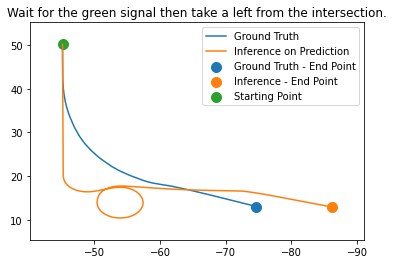

Episode 24: Stop in front of the white car
Frechet Distance: 13.004235632625607
Euclidean Distance between End Points: 13.004235632625607


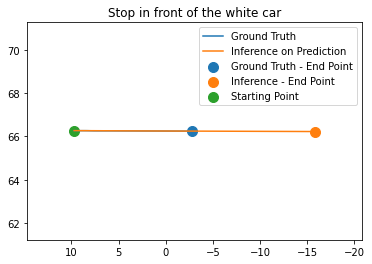

In [18]:
val_data_path = '/ssd_scratch/cvit/varunc/carla_data/val/'
val_run_path = '/ssd_scratch/cvit/varunc/val_fbf2//'
save_loc = '../trajectories/'

f_fbf2,e_fbf2 = get_scores(val_data_path, val_run_path, save_loc)

Episode 0: park near the bus stand
Frechet Distance: 7.800990411627128
Euclidean Distance between End Points: 7.800990411627128


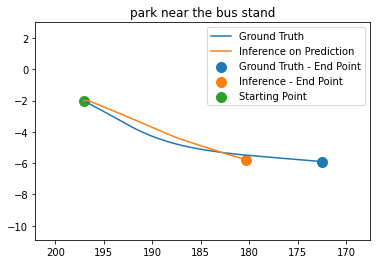

Episode 1: stop near the tallest building
Frechet Distance: 103.71988341750551
Euclidean Distance between End Points: 103.71988341750551


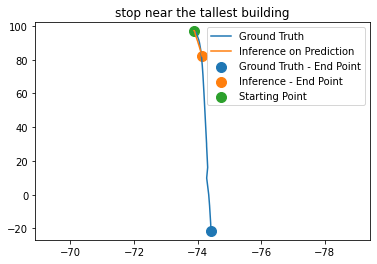

Episode 2: Take a right from the intersection
Frechet Distance: 0.5599468576841995
Euclidean Distance between End Points: 0.5599468576841995


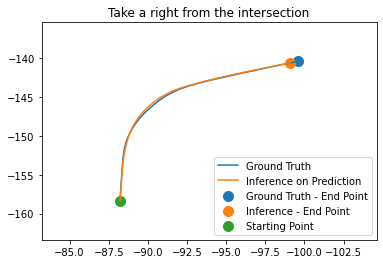

Episode 3: Go right from the corner
Frechet Distance: 15.351474907299222
Euclidean Distance between End Points: 15.351474907299224


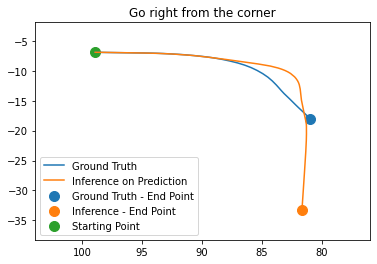

Episode 4: Drive towards the bus stop
Frechet Distance: 3.8777465886176747
Euclidean Distance between End Points: 3.8777465886176743


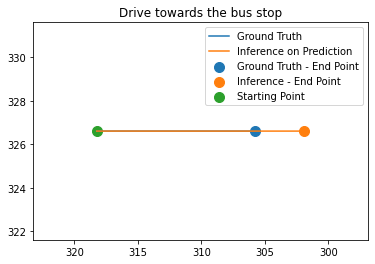

Episode 5: Take a left from the interection.
Frechet Distance: 184.49712597329608
Euclidean Distance between End Points: 89.05637743971764


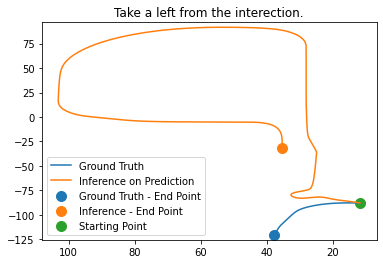

Episode 6: take a right and stop near the pedestrian
Frechet Distance: 14.05976950699146
Euclidean Distance between End Points: 14.05976950699146


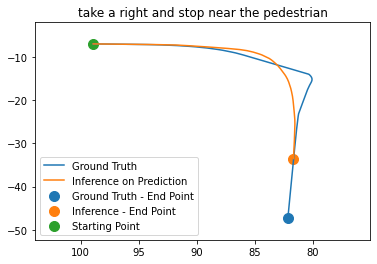

Episode 7: stop beside the black suv
Frechet Distance: 12.804752841151556
Euclidean Distance between End Points: 12.804752841151556


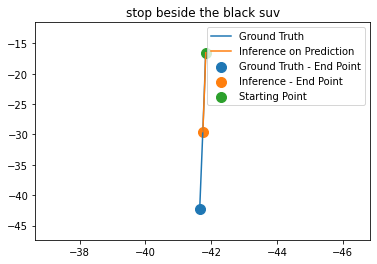

Episode 8: Wait for the signal to turn green and then go straight
Frechet Distance: 6.598957552269073
Euclidean Distance between End Points: 6.598957552269073


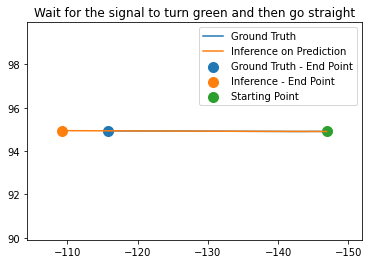

Episode 9: Go straight from the intersection and stop next to the bus stop.
Frechet Distance: 25.879015483549217
Euclidean Distance between End Points: 25.879015483549217


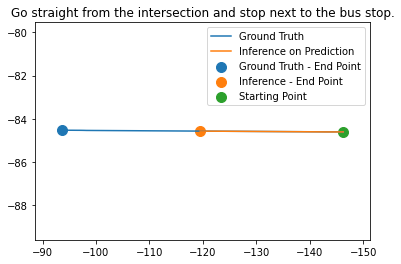

Episode 10: Go straight and park behind the first car you see
Frechet Distance: 2.0794376663449348
Euclidean Distance between End Points: 2.0794376663449348


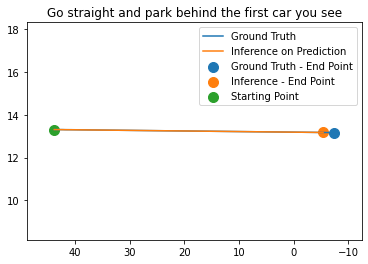

Episode 11: stop by the lamp pole
Frechet Distance: 0.568162040396936
Euclidean Distance between End Points: 0.568162040396936


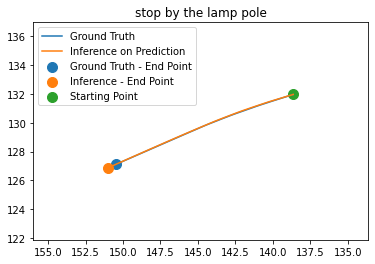

Episode 12: stop across the house with stairs
Frechet Distance: 23.17772318547092
Euclidean Distance between End Points: 23.17772318547092


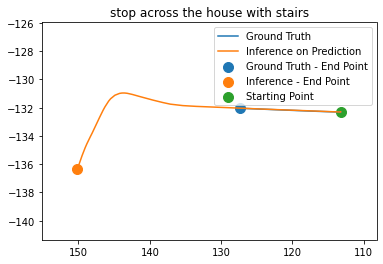

Episode 13: stop in front of the maroon car in rightmost lane
Frechet Distance: 12.678385144379149
Euclidean Distance between End Points: 12.678385144379147


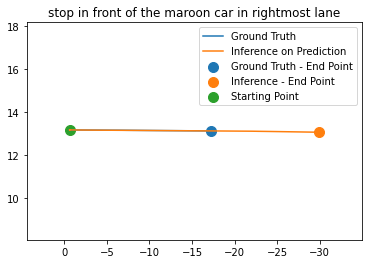

Episode 14: Go right from the corner
Frechet Distance: 15.103653003003004
Euclidean Distance between End Points: 15.103653003003004


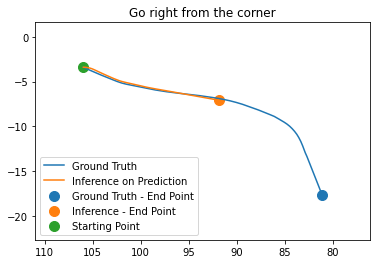

Episode 15: park behind the brown car
Frechet Distance: 36.013464340910424
Euclidean Distance between End Points: 36.013464340910424


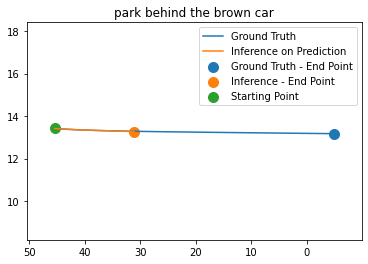

Episode 16: take a right and stop near the man in blue
Frechet Distance: 77.20013763266881
Euclidean Distance between End Points: 77.20013763266881


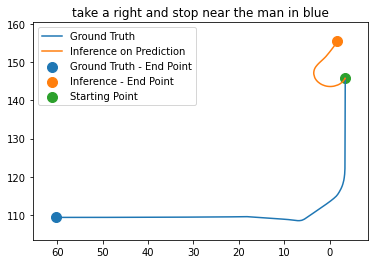

Episode 17: take a right at the intersection
Frechet Distance: 32.772653971125166
Euclidean Distance between End Points: 32.772653971125166


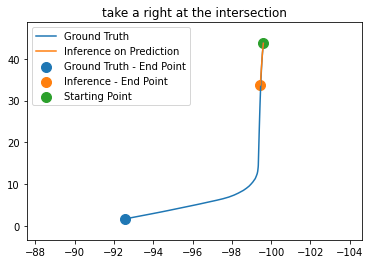

Episode 18: take a right at the traffic lights and then take a left
Frechet Distance: 70.57416463831701
Euclidean Distance between End Points: 70.57416463831701


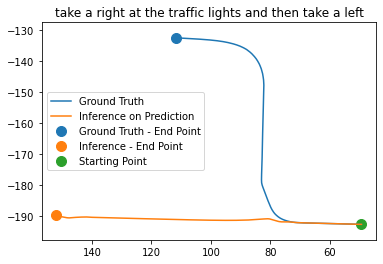

Episode 19: Take the road on the left
Frechet Distance: 10.752403462974351
Euclidean Distance between End Points: 10.752403462974351


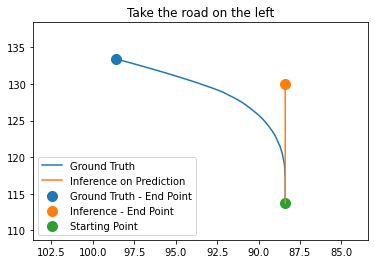

Episode 20: wait for traffic light then take left
Frechet Distance: 87.5713889419139
Euclidean Distance between End Points: 87.50657877966815


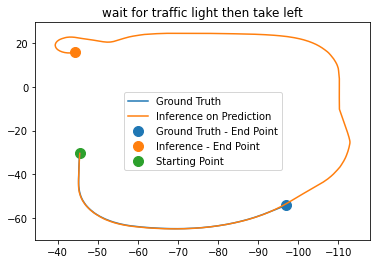

Episode 21: Stop as soon as you encounter a white car
Frechet Distance: 9.07420031950863
Euclidean Distance between End Points: 9.07420031950863


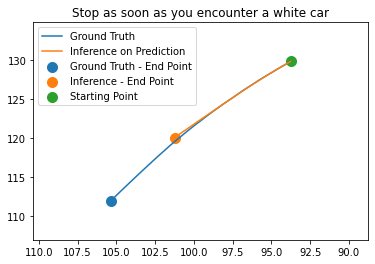

Episode 22: Stop near the blue dustbin which you see in front
Frechet Distance: 11.67106637161294
Euclidean Distance between End Points: 11.67106637161294


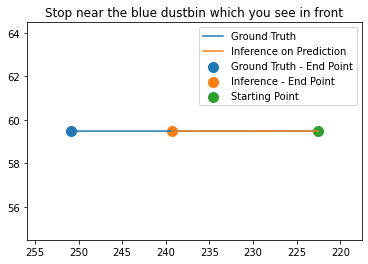

Episode 23: Wait for the green signal then take a left from the intersection.
Frechet Distance: 23.534600973874355
Euclidean Distance between End Points: 23.534600973874355


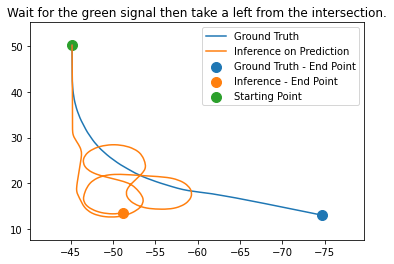

Episode 24: Stop in front of the white car
Frechet Distance: 8.796954853743378
Euclidean Distance between End Points: 8.796954853743378


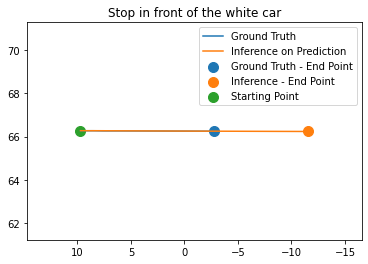

In [10]:
val_data_path = '/ssd_scratch/cvit/varunc/carla_data/val/'
val_run_path = '/ssd_scratch/cvit/varunc/val_run_baseline/'
save_loc = '../trajectories_baseline/'

f_bl,e_bl = get_scores(val_data_path, val_run_path, save_loc)

Episode 0: park near the bus stand
Frechet Distance: 6.118378885775076
Euclidean Distance between End Points: 6.118378885775076


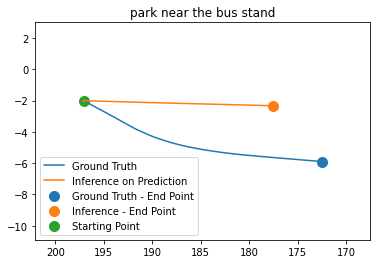

Episode 1: stop near the tallest building
Frechet Distance: 98.99325068054014
Euclidean Distance between End Points: 98.99325068054014


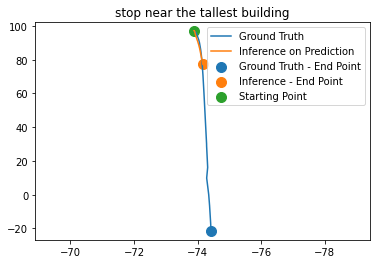

Episode 2: Take a right from the intersection
Frechet Distance: 197.09990754317872
Euclidean Distance between End Points: 104.24998346833068


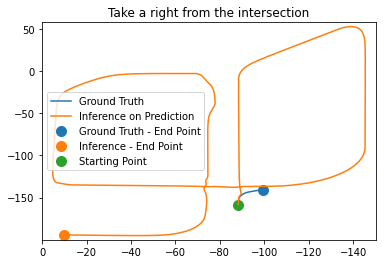

Episode 3: Go right from the corner
Frechet Distance: 4.075365406471343
Euclidean Distance between End Points: 4.075365406471343


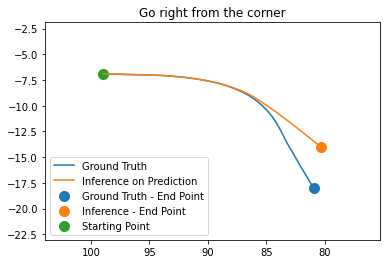

Episode 4: Drive towards the bus stop
Frechet Distance: 17.384704592707855
Euclidean Distance between End Points: 17.384704592707855


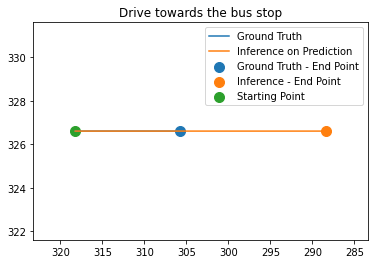

Episode 5: Take a left from the intersection.
Frechet Distance: 180.6006607901231
Euclidean Distance between End Points: 97.02483522399295


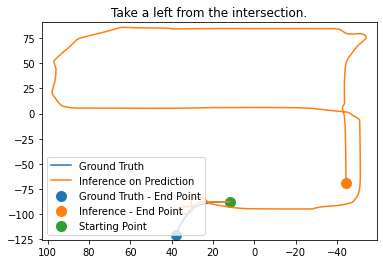

Episode 6: take a right and stop near the pedestrian
Frechet Distance: 258.720112728538
Euclidean Distance between End Points: 178.5807384115059


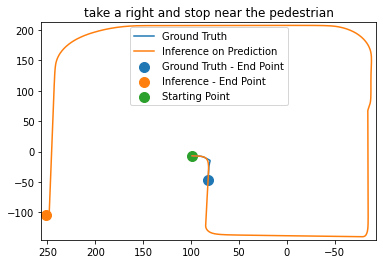

Episode 7: stop beside the black suv
Frechet Distance: 6.312397762980606
Euclidean Distance between End Points: 6.312397762980606


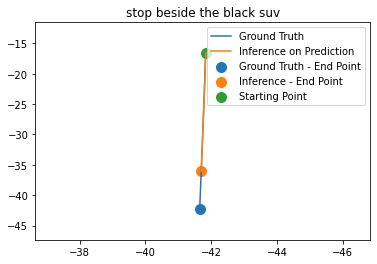

Episode 8: Wait for the signal to turn green and then go straight
Frechet Distance: 6.839474621321088
Euclidean Distance between End Points: 6.839474621321088


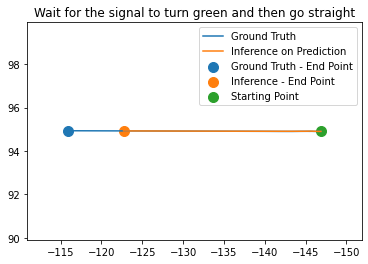

Episode 9: Go straight from the intersection and stop next to the bus stop.
Frechet Distance: 238.85246297655738
Euclidean Distance between End Points: 226.1993174287637


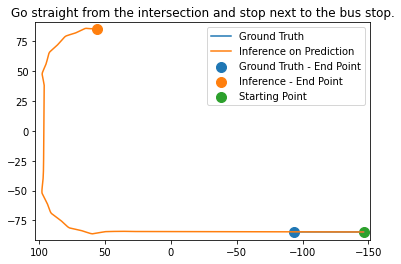

Episode 10: Go straight and park behind the first car you see
Frechet Distance: 106.53882385356856
Euclidean Distance between End Points: 106.27653875652314


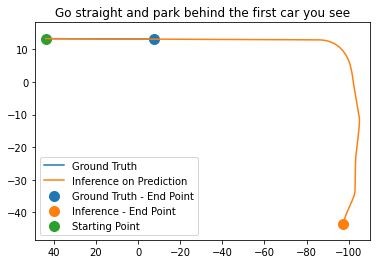

Episode 11: stop by the lamp pole
Frechet Distance: 3.866866162335083
Euclidean Distance between End Points: 3.866866162335083


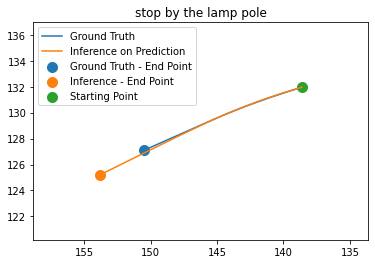

Episode 12: stop across the house with stairs
Frechet Distance: 160.40368126158032
Euclidean Distance between End Points: 22.274390394923277


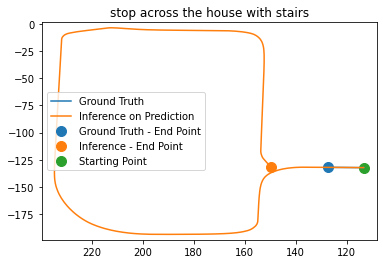

Episode 13: stop in front of the maroon car in rightmost lane
Frechet Distance: 104.01842750571656
Euclidean Distance between End Points: 27.20098707712007


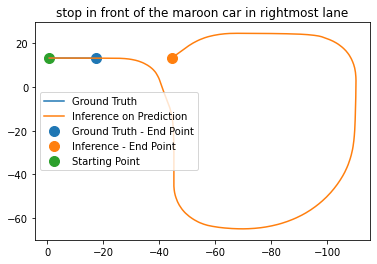

Episode 14: Go right from the corner
Frechet Distance: 18.8197832931072
Euclidean Distance between End Points: 18.8197832931072


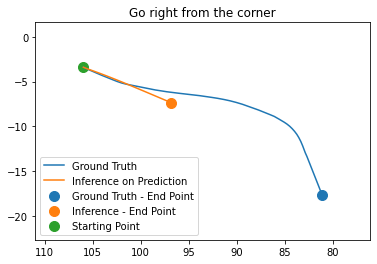

Episode 15: park behind the brown car
Frechet Distance: 27.764466438827032
Euclidean Distance between End Points: 27.764466438827032


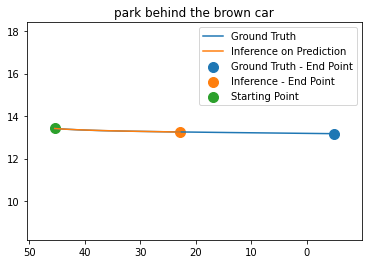

Episode 16: take a right and stop near the man in blue
Frechet Distance: 177.47662202693633
Euclidean Distance between End Points: 158.5762275498207


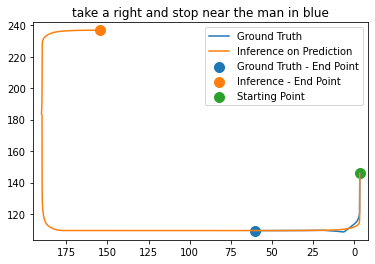

Episode 17: take a right at the intersection
Frechet Distance: 29.85121515323798
Euclidean Distance between End Points: 29.85121515323798


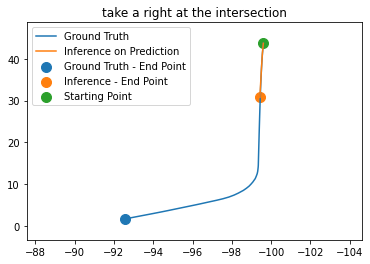

Episode 18: take a right at the traffic lights and then take a left
Frechet Distance: 227.11467959462672
Euclidean Distance between End Points: 227.11467959462672


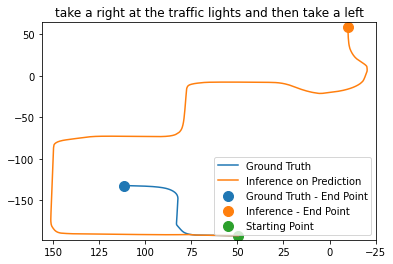

Episode 19: Take the road on the left
Frechet Distance: 212.19476872174266
Euclidean Distance between End Points: 107.54490563920236


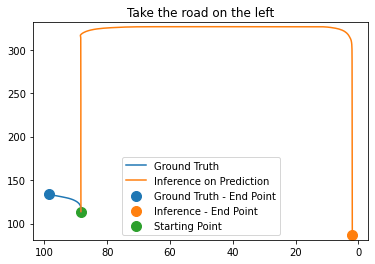

Episode 20: wait for traffic light then take left
Frechet Distance: 79.75183672964957
Euclidean Distance between End Points: 79.75183672964957


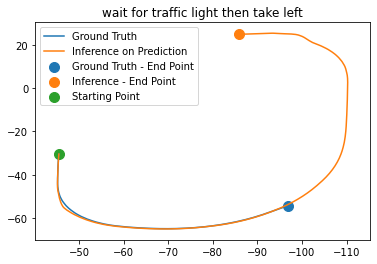

Episode 21: Stop as soon as you encounter a white car
Frechet Distance: 2.5511476723268003
Euclidean Distance between End Points: 2.5511476723268003


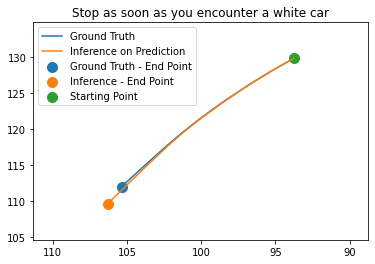

Episode 22: Stop near the blue dustbin which you see in front
Frechet Distance: 8.581497253530753
Euclidean Distance between End Points: 8.581497253530754


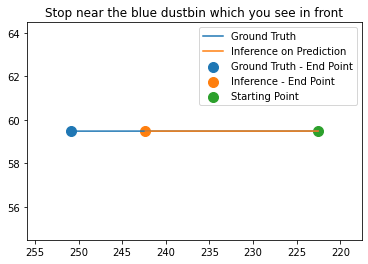

Episode 23: Wait for the green signal then take a left from the intersection.
Frechet Distance: 81.30124852276924
Euclidean Distance between End Points: 69.3169824555085


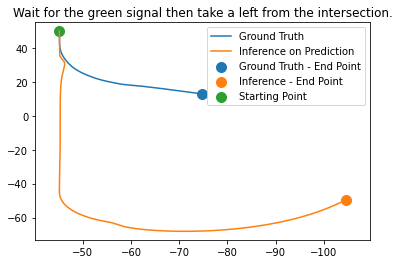

Episode 24: Stop in front of the white car
Frechet Distance: 17.423072752808217
Euclidean Distance between End Points: 17.423072752808217


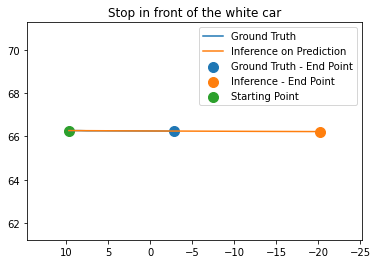

In [11]:
val_data_path = '/ssd_scratch/cvit/varunc/carla_data/val/'
val_run_path = '/ssd_scratch/cvit/varunc/val_convlstm/'
save_loc = '../trajectories_convlstm/'

f_convlstm,e_convlstm = get_scores(val_data_path, val_run_path, save_loc)

In [19]:
f_df = pd.DataFrame({'Cross Attention':f,'Concatenation':f_bl,'ConvLSTM':f_convlstm, 'FBF':f_fbf,'FBF2':f_fbf2})
e_df = pd.DataFrame({'Cross Attention':e,'Concatenation':e_bl,'ConvLSTM':e_convlstm, 'FBF':e_fbf,'FBF2':e_fbf2})

Text(0.5, 1.0, 'Freschet Distance')

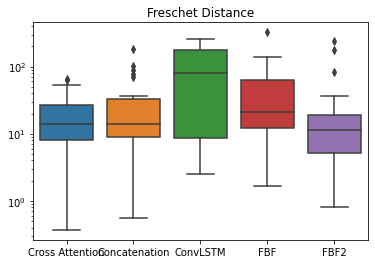

In [20]:
g = sns.boxplot(data=f_df)
g.set_yscale("log")
plt.title('Freschet Distance')

Text(0.5, 1.0, 'Euclidean Distance Between End Points')

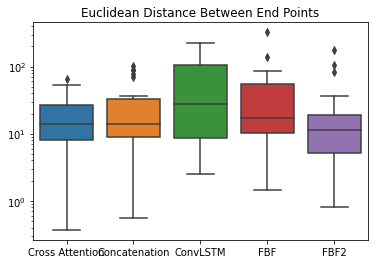

In [21]:
g = sns.boxplot(data=e_df)
g.set_yscale("log")
plt.title('Euclidean Distance Between End Points')